In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave

In [2]:
bird_large = imread('./ex8Data/bird_large.tiff')
bird_small = imread('./ex8Data/bird_small.tiff')

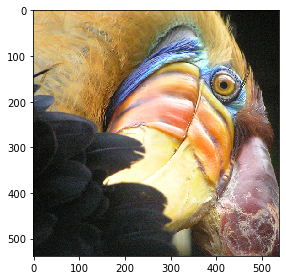

In [3]:
imshow(bird_large)

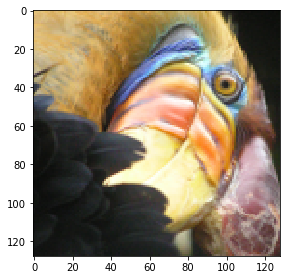

In [4]:
imshow(bird_small)

In [5]:
bird_large = bird_large.astype(np.double)
bird_small = bird_small.astype(np.double)

In [6]:
bird_small.shape

(128, 128, 3)

Go through each pixel in the small image and calculate its nearest mean.
$$
c^{(i)}:=arg\mathop{min}\limits_{j}||x^{(i)}-\mu_j||^2
$$
Update the values of the means based on the pixels assigned to them.
$$
\mu_j:=\frac{\sum^m_i1\{c^{(i)}=j\}x^{(i)}}{\sum^m_i1\{c^{(i)}=j\}}
$$

In [7]:
def k_mean(k, image, iter=100):
    mu = np.random.randint(0, 256, (k, 3)).astype(np.double)
    c = np.zeros((image.shape[0], image.shape[1]))

    for _ in range(iter):
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                min = 1e8
                for k in range(mu.shape[0]):
                    dis = np.power((image[i, j]-np.array(mu[k])), 2).sum()
                    if dis < min:
                        min = dis
                        c[i, j] = k

        mu = np.zeros(mu.shape)
        for i in range(c.shape[0]):
            for j in range(c.shape[1]):
                mu[int(c[i, j])] += image[i, j]

        for i in range(mu.shape[0]):
            if (c==i).sum() != 0:
                mu[i] /= (c==i).sum()
    
    temp = np.zeros((16, 3))
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            for k in range(3):
                temp[int(c[i, j])][k] += image[i, j, k]

    for i in range(temp.shape[0]):
        for j in range(3):
            temp[i, j] = temp[i, j] / (c==i).sum()

    new_image = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(3):
                new_image[i, j] = temp[int(c[i, j])]

    imshow(new_image.astype(int))

    return new_image

d:\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


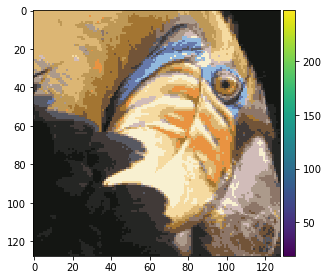

In [8]:
new_image = k_mean(16, bird_small, iter=100)

In [9]:
imsave('./new_image.tiff', new_image.astype(int))

C:\Users\A1029\AppData\Local\Temp/ipykernel_16736/1872821879.py:1: UserWarning: ./new_image.tiff is a low contrast image
  imsave('./new_image.tiff', new_image.astype(int))
